In [24]:
# zkouska  2023-24 - radny 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, freqs, decimate, convolve2d 

# ----- 3 baze DFT ----- 
n = np.arange(8) 
for k in np.arange(5):
    print ('--- ',k, ' ---')
    e = np.exp(-1j * 2 * np.pi *k / 8 * n) 
    print(np.around(e, decimals=2))


---  0  ---
[1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]
---  1  ---
[ 1.  +0.j    0.71-0.71j  0.  -1.j   -0.71-0.71j -1.  -0.j   -0.71+0.71j
 -0.  +1.j    0.71+0.71j]
---  2  ---
[ 1.+0.j  0.-1.j -1.-0.j -0.+1.j  1.+0.j  0.-1.j -1.-0.j -0.+1.j]
---  3  ---
[ 1.  +0.j   -0.71-0.71j -0.  +1.j    0.71-0.71j -1.  -0.j    0.71+0.71j
  0.  -1.j   -0.71+0.71j]
---  4  ---
[ 1.+0.j -1.-0.j  1.+0.j -1.-0.j  1.+0.j -1.-0.j  1.+0.j -1.-0.j]


[1. 0. 0.] [1.  1.  0.5]
0.4
0.8944271909999159
2.000075300287022
(1+0j) 0.39999999999999997
(6.123233995736766e-17+1j) 0.8944271909999157
(-1+1.2246467991473532e-16j) 2.0
0.5 0.5 1.414213562373095
1.5 0.5 0.6324555320336759


0.6324555320336759

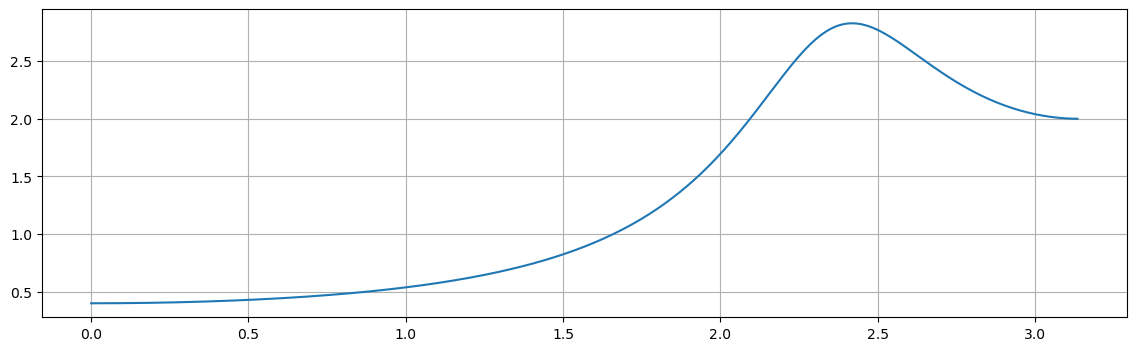

In [3]:
# --- 4 --- nuly poly frekv char 
n1 = 0
n2 = 0
p1 = -0.5+0.5j
p2 = -0.5-0.5j
b = np.poly([n1,n2])
a = np.poly([p1,p2])
print(b,a)
om,H = freqz(b,a,512)
fig = plt.figure(figsize=(14,4))
plt.plot(om,np.abs(H))
plt.gca().grid()

print(np.abs(H[0]))
print(np.abs(H[256]))
print(np.abs(H[511]))
# by hand 
ejo = np.exp(1j * 0)
absH = np.abs(ejo-n1) * np.abs(ejo-n2) / np.abs(ejo-p1) / np.abs(ejo-p2)
print(ejo, absH)
ejo = np.exp(1j * np.pi / 2)
absH = np.abs(ejo-n1) * np.abs(ejo-n2) / np.abs(ejo-p1) / np.abs(ejo-p2)
print(ejo, absH)
ejo = np.exp(1j * np.pi )
absH = np.abs(ejo-n1) * np.abs(ejo-n2) / np.abs(ejo-p1) / np.abs(ejo-p2)
print(ejo, absH)
# hodnoty do pomucky 
def inv_euclid(a,b):
    ie = 1/np.sqrt(np.square(a) + np.square(b))
    print(a,b,ie)
    return(ie)
inv_euclid(0.5,0.5)
inv_euclid(1.5,0.5)

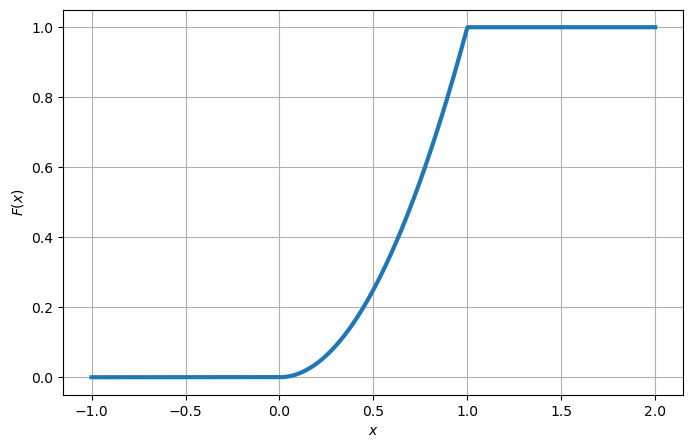

In [36]:
# ---- 7 distrib fce ----
x = np.linspace(-1, 2, 500)
Fx = np.zeros(x.size)
ii = np.argwhere((x > 0) & (x < 1))
Fx[ii] = np.power(x[ii],2)
Fx[x>=1] = 1
fig=plt.figure(figsize=(8,5)); plt.plot(x, Fx, linewidth=3); 
fig.gca().set_xlabel('$x$'); fig.gca().set_ylabel('$F(x)$'); fig.gca().grid()
fig.savefig('fig/7_Fx.eps',bbox_inches='tight')

In [35]:
# ---- 8 ----
from_counts_to_proba = 1/4000
from_proba_to_pdf = 1 / 100
integration = 100
Rraw = (-5) * (-5) * 1000 + (5) * (-5) * 1000 + (-5) * (5) * 1000 + (15) * (15) * 1000
R = Rraw * from_counts_to_proba * from_proba_to_pdf * integration
print (Rraw,R)

200000 50.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


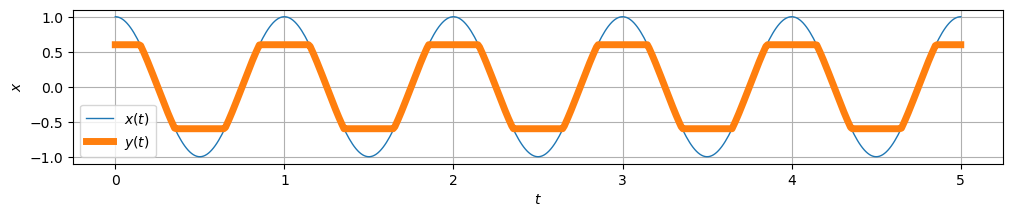

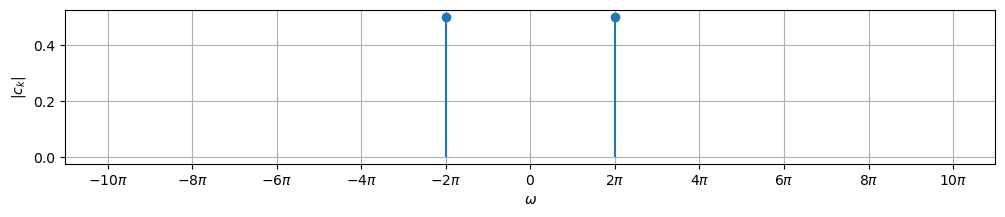

In [60]:
# --- 13 ---
t = np.linspace(0, 5, 500)
x = np.cos(2*np.pi * t )
fig=plt.figure(figsize=(12,2)); 
plt.plot(t, x, linewidth=1,label='$x(t)$'); 
y = x.copy()
y[x>=0.6] = 0.6
y[x<=-0.6] = -0.6
plt.plot(t, y, linewidth=5,label='$y(t)$'); 
fig.gca().set_xlabel('$t$'); fig.gca().set_ylabel('$x$'); fig.gca().grid()
fig.gca().legend()
fig.savefig('fig/13_cos.eps',bbox_inches='tight')

om = np.arange(-10*np.pi, 10.1*np.pi,2*np.pi)
oms = [-2*np.pi, 2*np.pi]
cs = [0.5,0.5]
fig=plt.figure(figsize=(12,2)); plt.stem(oms, cs, basefmt=" "); 
plt.gca().set_xlabel('$\omega$')
plt.gca().set_ylabel('$|c_k|$')
plt.gca().grid()
plt.gca().set_xlim(-11*np.pi, 11*np.pi)
plt.gca().set_xticks(om)
plt.gca().set_xticklabels(['$-10\pi$', '$-8\pi$','$-6\pi$','$-4\pi$','$-2\pi$','$0$','$2\pi$','$4\pi$','$6\pi$','$8\pi$','$10\pi$'])
fig.savefig('fig/13_ck.eps',bbox_inches='tight')

In [56]:
# ---- 17 ---- nul boidy poly 
n1 = 10j; n2 = -n1; p1 = 0; p2 = 0; b = np.poly([n1,n2]); a = np.poly([p1,p2])
print(b,a)
n1 = 6j; n2 = -n1; p1 = 0; p2 = 0; b = np.poly([n1,n2]); a = np.poly([p1,p2])
print(b,a)
n1 = 4j; n2 = -n1; p1 = 0; p2 = 0; b = np.poly([n1,n2]); a = np.poly([p1,p2])
print(b,a)
n1 = 3j; n2 = -n1; p1 = 0; p2 = 0; b = np.poly([n1,n2]); a = np.poly([p1,p2])
print(b,a)

[  1.   0. 100.] [1. 0. 0.]
[ 1.  0. 36.] [1. 0. 0.]
[ 1.  0. 16.] [1. 0. 0.]
[1. 0. 9.] [1. 0. 0.]


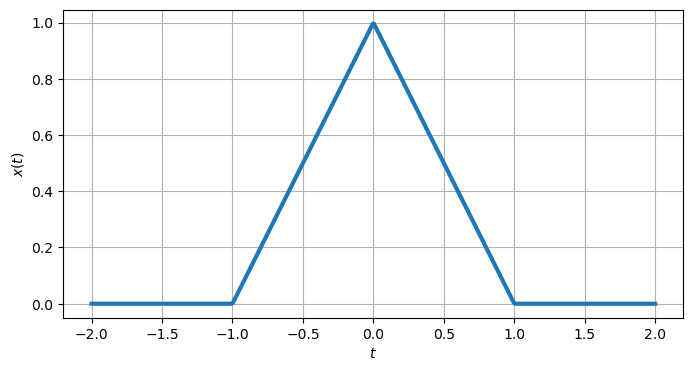

In [59]:
# ---- 18 ---- vstup trojuhelnik 
t = np.linspace(-2, 2, 500)
x = np.zeros(t.size)
ii = np.argwhere((t > -1) & (t <= 0)); x[ii] = 1+t[ii]
ii = np.argwhere((t > 0) & (t <= 1)); x[ii] = 1-t[ii]
fig=plt.figure(figsize=(8,4)); plt.plot(t, x, linewidth=3); 
fig.gca().set_xlabel('$t$'); fig.gca().set_ylabel('$x(t)$'); fig.gca().grid()
fig.savefig('fig/18.eps',bbox_inches='tight')
